In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

The upsampling we learnt till now,  
___Drawbacks___:  
- doesn't create new data points (unlike SMOTE)
- since the new data points are just copy of previous ones, the model learns the data instead of understanding and predicting unfamiliar data
- For large data, it makes the taining of models slow, because it do not increase variance in data

(Notice that, the scatter plot of minority data and its upsampled version (using resample) are same.)

In [190]:
from sklearn.datasets import make_classification
'''
To generate synthetic classification datasets. It helps create datasets with specific properties for testing and training machine learning models.
'''

'\nTo generate synthetic classification datasets. It helps create datasets with specific properties for testing and training machine learning models.\n'

n_samples → Number of data points (rows).  
n_features → Total number of input features (columns). 
n_informative → Number of features that are actually useful for classification.  
n_classes → Number of classes (here class 0, class 1)   
n_redundant → Number of features that are copies of informative ones.   
n_clusters_per_class → How scattered each class is.
Example: n_clusters_per_class=1 → Each class has a single cluster.
Higher values → More spread-out clusters.  
weights → Class distribution (useful for imbalanced data).
Example: weights=[0.9, 0.1] → 90% of samples belong to Class 0, 10% to Class 1.  
random_state → Fixes randomness for repeatability. (same as random_seed)

In [191]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,weights=[0.90,0.10],n_redundant=0,random_state=10)   # we assign it to x,y since it gives two 

In [192]:
print(X,"\n")
print(y,"\n")

print(X.shape,"\n")     # This contains your feature1 and feature2
print(y.shape,"\n")     # This contains your target variable

[[ 1.45122049 -1.08670474]
 [-0.09086088 -2.27774047]
 [ 1.91805213 -1.0431487 ]
 ...
 [ 0.83675119 -0.54161851]
 [ 0.45782986 -1.05177133]
 [ 0.27891721 -1.16309231]] 

[0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 

In [193]:
df1 = pd.DataFrame(X,columns=['Feature1','Feature2'])
df2 = pd.DataFrame(y,columns=['Target'])
final_df = pd.concat([df1,df2],axis=1)

print(final_df.shape)
print(final_df['Target'].value_counts())    # The output is near 9:1, since that make_classification only make approximate ratio
final_df.head()

(1000, 3)
Target
0    896
1    104
Name: count, dtype: int64


,Feature1,Feature2,Target
0,1.451220,-1.086705,0
1,-0.090861,-2.277740,1
2,1.918052,-1.043149,0
3,1.389333,-1.253164,0
4,-1.479985,-0.316676,1


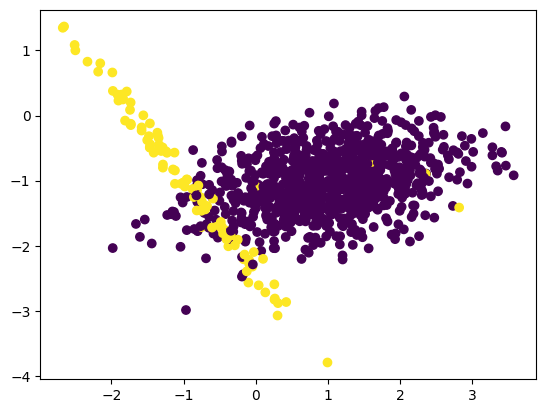

In [194]:
plt.scatter(final_df['Feature1'],final_df['Feature2'],c=final_df['Target'])

In [195]:
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique

In [ ]:
smote = SMOTE(random_state=10)    # Make instance of class SMOTE
X_resampled,y_resampled=smote.fit_resample(X,y)
# fit_resample : balances imbalanced datasets(X,y) by oversampling the minority class (here minority class is 'Target = 1')


df1 = pd.DataFrame(X_resampled,columns=['Feature1','Feature2'])
df2 = pd.DataFrame(y_resampled,columns=['Target'])
final_df = pd.concat([df1,df2],axis=1)
print(final_df.shape)
final_df.head()

(1792, 3)


,Feature1,Feature2,Target
0,1.451220,-1.086705,0
1,-0.090861,-2.277740,1
2,1.918052,-1.043149,0
3,1.389333,-1.253164,0
4,-1.479985,-0.316676,1


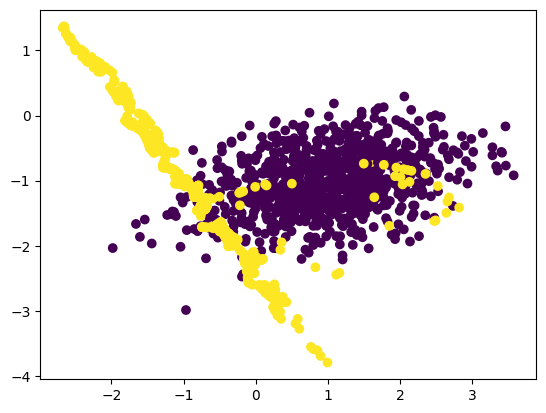

In [198]:
plt.scatter(final_df['Feature1'],final_df['Feature2'],c = final_df['Target'])

see that difference that new data points are created synthetically with variance in the upsampled data

In [ ]:
# Show difference in scatter plot, when used resample and smote

Target
0    896
1    104
Name: count, dtype: int64


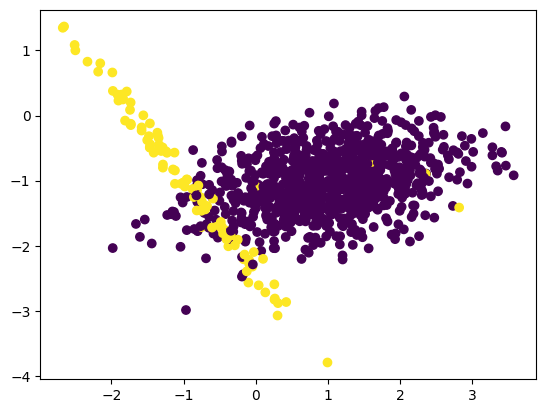

In [204]:
# This was my original data 
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,weights=[0.90,0.10],n_redundant=0,random_state=10)  

df1  = pd.DataFrame(X,columns=['Feature1','Feature2'])
df2 = pd.DataFrame(y,columns=['Target'])
final_df = pd.concat([df1,df2],axis=1)

print(final_df['Target'].value_counts())
plt.scatter(final_df['Feature1'],final_df['Feature2'],c=final_df['Target'])


In [245]:
minorty_df = final_df[final_df['Target']==1]
print(minorty_df.shape)

majority_df = final_df[final_df['Target']==0]
print(majority_df.shape)

(104, 3)
(896, 3)


In [248]:
from sklearn.utils import resample
resampled_minority_df = resample(minorty_df,replace=True,n_samples=majority_df.shape[0])

upsampled_final_df = pd.concat([resampled_minority_df,majority_df],axis=0)
upsampled_final_df.reset_index(drop=True)

,Feature1,Feature2,Target
0,-2.500111,1.001949,1
1,-2.510189,1.084585,1
2,-0.484066,-1.633789,1
3,0.258285,-2.592445,1
4,-2.154754,0.802987,1
...,...,...,...
1787,0.196916,-1.154123,0
1788,0.869515,-1.147480,0
1789,0.836751,-0.541619,0
1790,0.457830,-1.051771,0


In [250]:
upsampled_final_df['Target'].value_counts()

Target
1    896
0    896
Name: count, dtype: int64

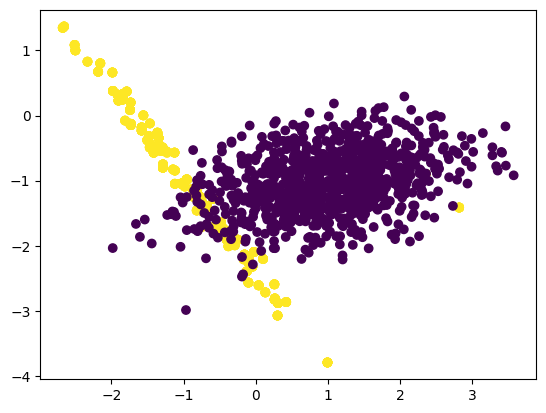

In [252]:
plt.scatter(upsampled_final_df['Feature1'],upsampled_final_df['Feature2'],c=upsampled_final_df['Target'])

# Notice that even tho samples increased in minority class (yellow colored) the scatter plot is almost same,
# Cuz, we do not get new points here unlike SMOTE 